#### Business understanding
A drone delivery company aims to optimize its delivery process by strategically placing depots. The company has a dataset containing customer locations and wants to determine the optimal depot locations based on different numbers of depots. The goal is to maximize efficiency by ensuring that customers are well-distributed among the depots.

### Data understanding
    
This dataset contains the locations of customers. The dataset has the following columns:  
   - ***clientid*** : The unique identifier for the customer
   - ***x*** : The x coordinate of the customer's location, when plotted into a 2D plane
   - ***y*** : The y coordinate of the customer's location, when plotted into a 2D plane

The dataset has 5936 rows of data and has no missing values or outliers.

In [795]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt

# read dataframe from local file
df = pd.read_csv('data/drone_cust_locations.csv', sep=';')
df 

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298
...,...,...,...
5951,5952,832.857394,616.861410
5952,5953,242.734500,490.325092
5953,5954,108.690847,758.833921
5954,5955,803.251074,430.740623


### Data preparation
Since id is not a useful feature for clustering, we will drop it.

In [796]:
df.drop('clientid', axis=1, inplace=True)
df

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


we plot the data so we can see visually how the customers are located in the 2D plane.
we can see from the data that it contains somekind of unoccupied zone in the middle maybe a road or a river, but there still seems to be couple of the customers in it so a big river with an island(?).
also the customers are not evenly distributed in the area. This uneven distribution may impact clustering performance.

<Axes: xlabel='x', ylabel='y'>

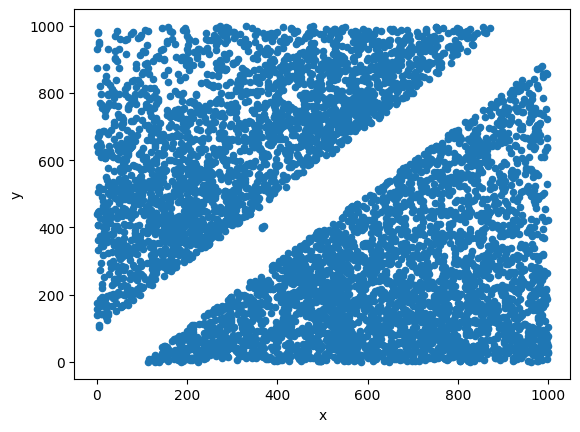

In [797]:
df.plot.scatter(x='x', y='y')
# Miten tän tulkitsee? Keskellä on tie/joki/metsä/pelto ??

## Modelling
In this step, we applied **K-Means clustering** to assign customers to depots.  
Since the task requires testing different numbers of depots, we created **three datasets** with **3, 5, and 10 depots**.  

Created a function to assign depots to customers using K-Means clustering.

In [798]:
from sklearn.cluster import KMeans

def assign_depots(df, num_depots):
    model = KMeans(init='random', n_clusters=num_depots, random_state=42).fit(df)
    df = df.copy()  # Avoid modifying original DataFrame
    df["Depot"] = model.labels_ + 1  # Assign depots (1-based index)
    
    return df, model.cluster_centers_,model

Created dataframe with 3 depots

In [799]:
df_3, cluster_locations_3,model_3 = assign_depots(df, 3)
df_3.head(10)

,x,y,Depot
0,622.771572,164.857623,1
1,416.357298,630.193634,3
2,292.735020,567.333231,2
3,737.211288,166.225676,1
4,540.475375,682.912298,3
5,535.469492,318.439661,1
6,640.380050,870.833221,3
7,235.772075,359.048203,2
8,481.896884,661.491838,3
9,730.032789,312.177817,1


Created dataframe with 5 depots

In [800]:
df_5,cluster_locations_5,model_5 = assign_depots(df, 5)
df_5.head(10)

,x,y,Depot
0,622.771572,164.857623,3
1,416.357298,630.193634,4
2,292.735020,567.333231,1
3,737.211288,166.225676,3
4,540.475375,682.912298,4
5,535.469492,318.439661,2
6,640.380050,870.833221,4
7,235.772075,359.048203,1
8,481.896884,661.491838,4
9,730.032789,312.177817,3


Created dataframe with 10 depots

In [801]:
df_10, cluster_locations_10,model_10 = assign_depots(df, 10)
df_10.head(10)

,x,y,Depot
0,622.771572,164.857623,9
1,416.357298,630.193634,2
2,292.735020,567.333231,10
3,737.211288,166.225676,5
4,540.475375,682.912298,2
5,535.469492,318.439661,9
6,640.380050,870.833221,6
7,235.772075,359.048203,7
8,481.896884,661.491838,2
9,730.032789,312.177817,3


## Evaluation
In evaluation we will look at the following aspects:
- **Visualization**: We will visualize the customer locations and depot locations on a 2D plane.
- **Silhouette Score**: We will calculate the silhouette score to evaluate the quality of clustering.
- **Computation Time**: We will compare the computation time for K-Means and Hierarchical clustering algorithms with different numbers of depots.
- **Recommendation**: We will recommend the optimal number of depots based on the evaluation results.

In [802]:
print(cluster_locations_3)

[[702.08109226 211.2703835 ]
 [198.44098904 383.25861847]
 [548.20586479 787.2788963 ]]


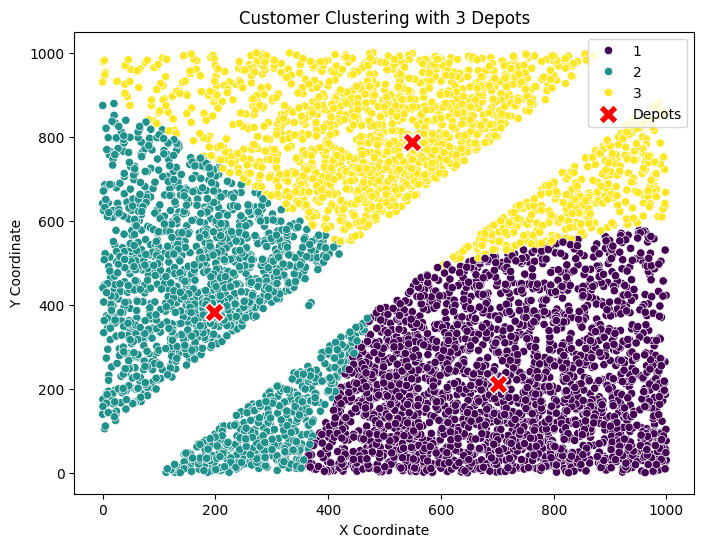

In [803]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', hue='Depot', data=df_3, palette='viridis')
sns.scatterplot(x=cluster_locations_3[:, 0], y=cluster_locations_3[:, 1], color='red', marker='X', s=200, label="Depots")
plt.legend()
plt.title(f"Customer Clustering with 3 Depots")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [804]:
print(cluster_locations_5)

[[161.66576189 496.42518124]
 [437.55214927 148.27394138]
 [804.48717854 152.08302262]
 [487.89762092 825.48891337]
 [807.40470255 531.83409059]]


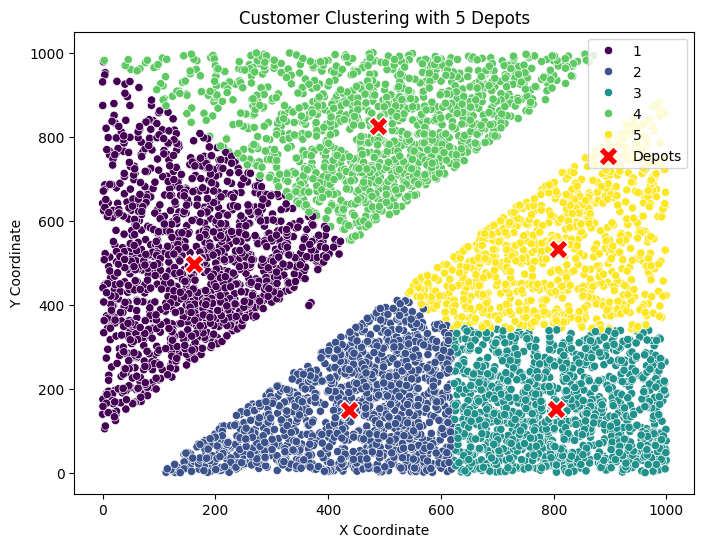

In [805]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', hue='Depot', data=df_5, palette='viridis')
sns.scatterplot(x=cluster_locations_5[:, 0], y=cluster_locations_5[:, 1], color='red', marker='X', s=200, label="Depots")
plt.legend()
plt.title(f"Customer Clustering with {5} Depots")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [806]:
print(cluster_locations_10)

[[881.10218422 635.21820804]
 [452.0773205  767.46252873]
 [732.73746126 401.79973121]
 [308.10079757  87.32225671]
 [849.63070889 128.41204786]
 [648.68575066 895.59442536]
 [107.44746876 365.00430943]
 [152.50728205 799.99674306]
 [547.0171653  171.36638491]
 [250.11367099 534.29876157]]


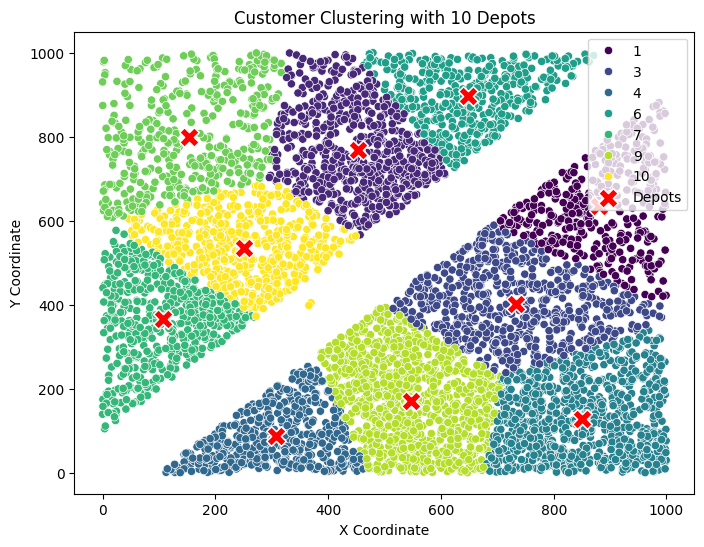

In [807]:

plt.figure(figsize=(8,6))
sns.scatterplot(x='x', y='y', hue='Depot', data=df_10, palette='viridis')
sns.scatterplot(x=cluster_locations_10[:, 0], y=cluster_locations_10[:, 1], color='red', marker='X', s=200, label="Depots")
plt.legend()
plt.title(f"Customer Clustering with 10 Depots")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

In [808]:
#with 3 depots
df_3["Depot"].value_counts()

Depot
1    2488
2    1762
3    1706
Name: count, dtype: int64

In [809]:
#with 5 depots
df_5["Depot"].value_counts()

Depot
1    1356
2    1325
4    1282
3    1160
5     833
Name: count, dtype: int64

In [810]:
#with 10 depots
df_10["Depot"].value_counts()

Depot
9     975
5     819
2     647
3     612
7     573
10    565
4     516
6     444
8     409
1     396
Name: count, dtype: int64

### Silhouette Score
Based on our silhouette scores there doesnt seem to be strong differences between how many depots we use, the depots will either way share some but marginal amount of customers.

In [811]:
from sklearn.metrics import silhouette_score
# Compute Silhouette Score
silhouette_3 = silhouette_score(df, model_3.labels_)
print(f"Silhouette Score for 3 depots: {silhouette_3:.2f}")
silhouette_5 = silhouette_score(df, model_5.labels_)
print(f"Silhouette Score for 5 depots: {silhouette_5:.2f}")
silhouette_10 = silhouette_score(df, model_10.labels_)
print(f"Silhouette Score for 10 depots: {silhouette_10:.2f}")

Silhouette Score for 3 depots: 0.42
Silhouette Score for 5 depots: 0.42
Silhouette Score for 10 depots: 0.37


### Computation times
We tested the computation times for both K-Means and Hierarchical clustering algorithms with different numbers of depots. In K-Means clustering, the number of clusters led to a noticeable percentual increase in computation time, though the absolute differences remained small due to the small dataset. However, in Hierarchical clustering, the number of clusters had no effect at all.

In [812]:
import time
from sklearn.cluster import AgglomerativeClustering, KMeans

#function to calculate the computation time for clustering
def fit_clustering(clusters, method="kmeans"):

    start_time = time.time()
    if method == "kmeans":
        model = KMeans(init='random', n_clusters=clusters, random_state=42)
    elif method == "hierarchical":
        model = AgglomerativeClustering(n_clusters=clusters)
    else:
        raise ValueError("Invalid method. Choose 'kmeans' or 'hierarchical'.")

    labels = model.fit_predict(df)
    end_time = time.time()
    
    return labels, end_time - start_time


calculating kmeans computation time for 5, 10, and 20 clusters

In [813]:
for n in [5, 10, 20]:
    labels, duration = fit_clustering(n, method="kmeans")
    print(f'Number of depots (K-Means): {n}, Computation time: {duration:.4f} seconds')

Number of depots (K-Means): 5, Computation time: 0.0370 seconds
Number of depots (K-Means): 10, Computation time: 0.0490 seconds
Number of depots (K-Means): 20, Computation time: 0.0670 seconds


calculating hierarchical computation time for 5, 10, and 20 clusters

In [814]:
for n in [5, 10, 20]:
    labels, duration = fit_clustering(n, method="hierarchical")
    print(f'Number of depots (Hierarchical): {n}, Computation time: {duration:.4f} seconds')



Number of depots (Hierarchical): 5, Computation time: 0.7490 seconds
Number of depots (Hierarchical): 10, Computation time: 0.6790 seconds
Number of depots (Hierarchical): 20, Computation time: 0.6590 seconds


## Conclusion
Based on the results i would recommend 5 depots as the best solution, the customers are distributed pretty evenly and like we realized earlier that the silhouette score was marginal between the different depot counts. Sooo i think the bigger problem would be that how many customers can one depot handle and whats the maximum distance for deliveries? 

### **Recommended Locations with 3 Depots**  

| **Depot** |**Coordinates (X, Y)** |
|-----------|-------------------------|
| **Depot 1** | (702.08, 211.27) |
| **Depot 2** | (198.44, 383.26)        |
| **Depot 3** | (548.21, 787.28)        |


### **Recommended Locations with 5 Depots**  

| **Depot** | **Coordinates (X, Y)** |
|-----------|--------------------|
| **Depot 1** | (161.67, 496.43) |
| **Depot 2** | (437.55, 148.27) |
| **Depot 3** | (804.49, 152.08) |
| **Depot 4** | (487.90, 825.49) |
| **Depot 5** | (807.40, 531.83) |

### **Recommended Locations with 10 Depots**  

| **Depot** | **Coordinates (X, Y)** |
|-----------|--------------------|
| **Depot 1** | (881.10, 635.22) |
| **Depot 2** | (452.08, 767.46) |
| **Depot 3** | (732.74, 401.80) |
| **Depot 4** | (308.10, 87.32) |
| **Depot 5** | (849.63, 128.41) |
| **Depot 6** | (648.69, 895.59) |
| **Depot 7** | (107.45, 365.00) |
| **Depot 8** | (152.51, 799.99) |
| **Depot 9** | (547.02, 171.37) |
| **Depot 10** | (250.11, 534.30) |

# Hierarchical clustering vs KMeans
Hierarchial clustering is computationally more expensive than kmeans, but the biggest problem i see in this case is that there doesnt seem to be any center to the clusters, so it would be impossible to assign well balanced depots to the clusters. We can actually see clearly in KMeanss where the center is on the cluster and it seems balanced even on the distance scale not just on customer count.



In [815]:

df2 = pd.read_csv('data/drone_cust_locations.csv', sep=';')

dropped_data = df2.drop(columns=['clientid'])

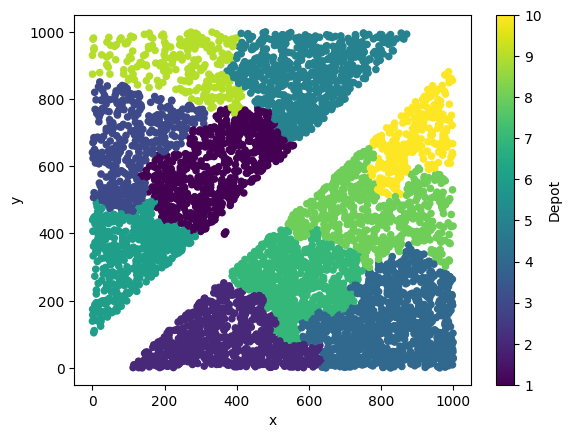

In [816]:
# Discuss the differences in this context.
# KMeans:in klusterit ovat symmetrisempiä kokoavan hierarkisen klusteroinnin klustereihin verrattuna

model = AgglomerativeClustering(n_clusters=10)
model.fit(dropped_data)
df2['Depot'] = model.labels_ + 1
df2.plot.scatter(x="x", y="y", c='Depot', cmap="viridis");

In [817]:
df2['Depot'].value_counts()

Depot
4     994
2     808
5     721
1     704
7     695
8     554
6     524
3     432
10    267
9     257
Name: count, dtype: int64